<a href="https://colab.research.google.com/github/victoriaporter58/Computational-techniques-for-recognising-handwritten-digits/blob/master/Support_Vector_Parameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Support Vector Parameter Tuning

This file finds the optimal parameters for both the LinearSVC method and SVC method. See 'Optimised_Support_Vector_Classifier.ipynb' for the final model with optimised parameters.

Support Vector Classifier tries to find the best hyperplane to separate the different classes by maximizing the distance between the sample points and the hyperplane.The objective here is to find the parameter set-up that provides the most time efficient and accuracte analysis of the MNIST dataset. To do this, the following parameters are being considered:

* ***kernel***: A function which takes two data points as inputs and returns a similarity score. This similarity can be interpreted as a metric of closeness. The nearer the data points are, the higher the similarity.
* ***c***: Controls the trade off between having a smooth decision boundary and classifying the training points correctly. A high value for C tells the algorithm that you care more about classifying all the training points correctly than leaving wiggle room for future data.
* ***gamma***: The kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. A high gamma value will try to exactly fit the training dataset.

**Execution Instructions**:
Note that this notebook will take a significant amount of time to execute fully. See 'Optimised_SVM_Classifier.ipynb' for the final optimised implementation.

* Scroll to 'Downgrade Tensorflow' and run that cell only.
* Restart the runtime: Runtime > Restart runtime.
* Finally, execute the whole script: Runtime > Run all.
* Results and visualisations will appear below the respective cells.

**References**: 
* Code snippet: https://www.codingame.com/playgrounds/37409/handwritten-digit-recognition-using-scikit-learn
* SVC: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* LinearSVC: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

**Created by**: Victoria Porter

##Downgrade tensorflow
We need to downgrade tensorflow so that we can use it to import the MNIST dataset. Restart the runtime after executing this cell.

In [ ]:
pip install tensorflow==1.14

##Import and read the MNIST dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# import and read the MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/home/server/datasets/MNIST_data/')

# set-up dataset as numpy array
# seperate the dataset into training (60,000) images & labels and testing (10,000) images & labels
train_images = np.asarray(mnist.train.images)
train_labels = np.asarray(mnist.train.labels)
test_images = np.asarray(mnist.test.images)
test_labels = np.asarray(mnist.test.labels)

# record the expected results for comparison with predictions
expected = test_labels.tolist()

##Find the optimal C value for LinearSVC
The linear kernel in LinearSVC is implemented using liblinear.

* **Test 1**: C=1.0 (default)
* **Test 2**: C=0.1
* **Test 3**: C=0.01
* **Test 4**: C=0.001

In [ ]:
# set up classifier

# Test 1 - 2nd fastest
clf = LinearSVC(C=1.0)
# accuracy = 0.9178

# Test 2 - 1st fastest
#clf = LinearSVC(C=0.1)
# accuracy = 0.9178

# Test 3 - 3rd fastest
#clf = LinearSVC(C=0.01)
# accuracy = 0.9122

# Test 4 - 4th fastest
#clf = LinearSVC(C=0.001)
# accuracy = 0.9122

In [ ]:
# train using set up defined above
results = clf.fit(train_images, train_labels)

In [ ]:
# make predictions
predicted = clf.predict(test_images)

In [ ]:
# print the accuracy
print("Accuracy: ", accuracy_score(expected, predicted), "\n")

##Find the optimal C value for SVC with linear kernel

The linear kernel in SVC is implemented using libsvm.

* **Test 1**: C=1.0 (default)
* **Test 2**: C=0.1
* **Test 3**: C=0.01
* **Test 4**: C=0.001

In [ ]:
# set up classifier

# Test 1 - 2nd fastest
#clf = SVC(kernel='linear', C=1.0)
# accuracy = 0.9393

# Test 2 - 1st fastest
clf = SVC(kernel='linear', C=0.1)
# accuracy = 0.9453

# Test 3 - 3rd fastest
#clf = SVC(kernel='linear', C=0.01)
# accuracy = 0.9435

# Test 4 - 4th fastest
#clf = SVC(kernel='linear', C=0.001)
# accuracy = 0.9296

In [ ]:
# train using set up defined above
results = clf.fit(train_images, train_labels)

In [ ]:
# make predictions
predicted = clf.predict(test_images)

In [ ]:
# print the accuracy
print("Accuracy: ", accuracy_score(expected, predicted), "\n")

##Finding the optimal gamma value for SVC with poly kernel

* **Test 1**: gamma = 1
* **Test 2**: gamma = 10
* **Test 3**: gamma = 100

In [ ]:
# Test 1 - 3rd fastest
#clf = SVC(kernel='poly', C=0.001, gamma=1)
# accuracy = 0.9788

#Test 2 - 1st fastest
clf = SVC(kernel='poly', C=0.001, gamma=10)
# accuracy = 0.9788

#Test 3 - 2nd fastest
#clf = SVC(kernel='poly', C=0.001, gamma=100)
# accuracy = 0.9788

In [ ]:
# train using set up defined above
results = clf.fit(train_images, train_labels)

In [ ]:
# make predictions
predicted = clf.predict(test_images)

In [ ]:
# print the accuracy
print("Accuracy: ", accuracy_score(expected, predicted), "\n")

##Finding the optimal C value for SVC with poly kernel

* **Test 1**: C = 1
* **Test 2**: C = 0.1
* **Test 3**: C = 0.01
* **Test 4**: C = 0.001
* **Test 5**: C = 0.0001

In [ ]:
# Test 1 - 5th fastest
#clf = SVC(kernel='poly', C=1.0, gamma=10)
# accuracy = 0.9788

# Test 2 - 4th fastest
#clf = SVC(kernel='poly', C=0.1, gamma=10)
# accuracy = 0.9788

# Test 3 - 3rd fastest
#clf = SVC(kernel='poly', C=0.01, gamma=10)
# accuracy = 0.9788

# Test 4 - 1st fastest
clf = SVC(kernel='poly', C=0.001, gamma=10)
# accuracy = 0.9788

# Test 5 - 2nd fastest
#clf = SVC(kernel='poly', C=0.0001, gamma=10)
# accuracy = 0.9788

In [ ]:
# train using set up defined above
results = clf.fit(train_images, train_labels)

In [ ]:
# make predictions
predicted = clf.predict(test_images)

In [ ]:
# print the accuracy
print("Accuracy: ", accuracy_score(expected, predicted), "\n")

##Evaluate
Now that we have predictions, we want to visualise them.
* ***Accuracy***: The accuracy of our classifier.
* ***Classification report***: This shows us how accurate our classifier is at identifying each class.
* ***Confusion matrix***: This shows us exactly how many samples our classifier got correct/incorrect.

In [ ]:
# see how the model performed on each digit
print("Accuracy: ", accuracy_score(expected, predicted), "\n")
print("Classification Report:")
print(classification_report(expected, predicted), "\n")
print("Confusion Matrix:")
print(confusion_matrix(expected, predicted))

##Test
Set image_index equal to any value between 1 and 10,000 i.e. the test dataset. Use our trained classifier to make a prediction on a test image.

9


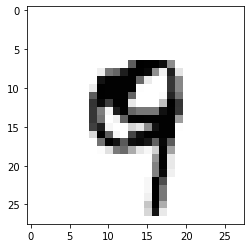

In [ ]:
# select image index from test dataset
image_index = 4444

# reshape the test image so that it fits on screen
# make colourmap greyscale
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')

# make a prediction on the image using the classifier defined and trained above
# (1,-1) means we are using a single sample
pred = clf.predict(test_images[image_index].reshape(1,-1))[0]

# print the classifier's prediction
print(pred)